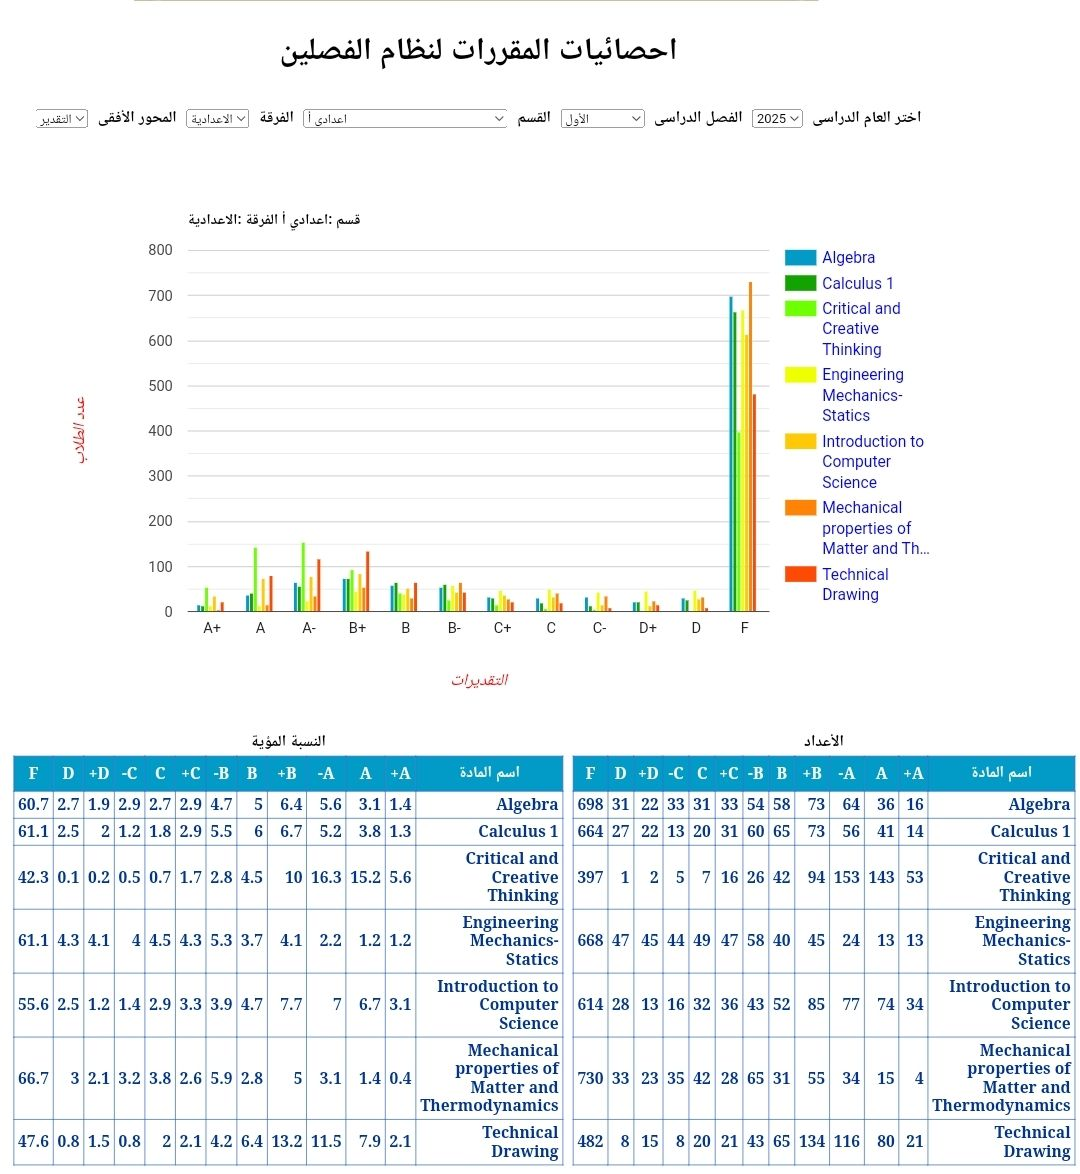

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Input Data: Replace these with your actual data
data = {
    "Grade": ["D", "D+", "C-", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"],
    "Algebra": [ 31, 22, 33, 31, 33, 54, 58, 73, 64, 36, 16],
    "Calculus 1": [27, 22, 13, 20, 31, 60, 65 , 73, 56, 41, 14],
    "Critical and Creative Thinking": [ 1, 2, 5, 7, 16, 26, 42, 94, 153, 143, 53],
    "Engineering Mechanics": [47, 45, 44, 49, 47, 58, 40, 45, 24, 13, 13],
    "Introduction to Computer Science": [28, 13, 16, 32, 36, 43, 52, 85, 77, 74, 34],
    "Mechanical Properties": [33, 23, 35, 42, 28, 65, 31, 55, 34, 15, 4],
    "Technical Drawing": [8, 15, 8, 20, 21, 43, 65, 134, 116, 80, 21]
}

# Convert to DataFrame
df = pd.DataFrame(data)
grades = df["Grade"]
subjects = df.columns[1:]

# --- 1. Descriptive Analysis ---
print("### Descriptive Statistics ###")
descriptive_stats = {}
for subject in subjects:
    total_students = sum(df[subject])
    pass_rate = sum([df[subject][i] for i in range(len(grades)) if grades[i] >= "D"]) / total_students * 100
    high_grades = sum([df[subject][i] for i in range(len(grades)) if grades[i] >= "B+"]) / total_students * 100
    failure_rate = sum([df[subject][i] for i in range(len(grades)) if grades[i] < "D"]) / total_students * 100
    descriptive_stats[subject] = {
        "Total Students": total_students,
        "Pass Rate (%)": pass_rate,
        "High Grades (B+ and above, %)": high_grades,
        "Failure Rate (%)": failure_rate
    }

# Convert to DataFrame for better display
stats_df = pd.DataFrame(descriptive_stats).T
print(stats_df)

# --- 2. Comparative Analysis ---
def plot_grade_distribution():
    plt.figure(figsize=(12, 8))
    for subject in subjects:
        sns.lineplot(x=grades, y=df[subject], label=subject)
    plt.title("Grade Distribution Across Subjects")
    plt.xlabel("Grade")
    plt.ylabel("Number of Students")
    plt.legend()
    plt.show()

plot_grade_distribution()

# --- 3. Statistical Analysis ---
print("\n### Normality Tests ###")
normality_results = {}
for subject in subjects:
    stat, p = shapiro(df[subject])
    normality_results[subject] = "Normal" if p > 0.05 else "Not Normal"

normality_df = pd.DataFrame.from_dict(normality_results, orient="index", columns=["Normality"])
print(normality_df)

# --- 4. Insights Visualization ---
def plot_pass_fail():
    plt.figure(figsize=(10, 6))
    pass_rates = stats_df["Pass Rate (%)"]
    fail_rates = stats_df["Failure Rate (%)"]
    subjects_list = stats_df.index

    bar_width = 0.4
    x = range(len(subjects_list))

    plt.bar(x, pass_rates, width=bar_width, label="Pass Rate", color="green")
    plt.bar([i + bar_width for i in x], fail_rates, width=bar_width, label="Fail Rate", color="red")

    plt.xlabel("Subjects")
    plt.ylabel("Percentage (%)")
    plt.title("Pass vs Fail Rates by Subject")
    plt.xticks([i + bar_width / 2 for i in x], subjects_list, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_pass_fail()

# --- 5. Gap Analysis ---
def perform_gap_analysis():
    target_pass_rate = 85  # Define target pass rate threshold
    target_high_grade_rate = 40  # Define target high-grade threshold

    gap_analysis = {}
    for subject in subjects:
        pass_gap = max(0, target_pass_rate - stats_df.loc[subject, "Pass Rate (%)"])
        high_grade_gap = max(0, target_high_grade_rate - stats_df.loc[subject, "High Grades (B+ and above, %)"])
        gap_analysis[subject] = {
            "Pass Rate Gap (%)": pass_gap,
            "High Grade Gap (%)": high_grade_gap
        }

    gap_df = pd.DataFrame(gap_analysis).T
    print("\n### Gap Analysis ###")
    print(gap_df)

    # Visualize gaps
    gap_df.plot(kind="bar", figsize=(12, 6), title="Gap Analysis (Pass and High Grades)", xlabel="Subjects", ylabel="Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

perform_gap_analysis()


ValueError: All arrays must be of the same length